In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set_parameters

output_suffix = "alignment_test3"

In [3]:
list_of_census = [
    "EW_1851",
    # "EW_1861",
    # "EW_1881",
    # "EW_1891",
    # "EW_1901",
    # "EW_1911",
    # "SCOT_1851",
    # "SCOT_1861",
    # "SCOT_1871",
    # "SCOT_1881",
    # "SCOT_1891",
    # "SCOT_1901",
]
# list_of_census = ["EW_1901"]
# list_of_census = ["SCOT_1901"]

# list_of_census = [
#     "EW_1851",
#     "EW_1861",
#     "EW_1881",
#     "EW_1891",
#     "EW_1901",
#     "EW_1911"
# ]

# list_of_census = [
# "SCOT_1851",
# "SCOT_1861",
# "SCOT_1871",
# "SCOT_1881",
# "SCOT_1891",
# "SCOT_1901"
# ]

list_of_geoms = ["os_open_roads", "gb1900"]



In [12]:

output_suffix = "alignment_test3"

# combine linked files with lkups iterating over census years, geoms, and partitions (combining all partitions into one file)
for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	print(year, country)
	for geom in list_of_geoms:
		merged_list = []
		geom_output_dir = pathlib.Path(f"output_{output_suffix}/{year}/{country}/{geom}/linked")
		for file_p in geom_output_dir.iterdir():
			partition = file_p.name.split("_")[0]
			linked_partion = pd.read_csv(file_p, sep="\t", usecols=["unique_add_id", f"{geom}_{country}_{year}", "rapidfuzzy_wratio_s"])
			lkup = pd.read_csv(f"output_{output_suffix}/{year}/{country}/{country}_{year}_{partition}_lkup.tsv", sep="\t")
			merged = pd.merge(left = lkup, right = linked_partion, on = "unique_add_id", how = "left")
			merged_list.append(merged)
		merged_all = pd.concat(merged_list)
		output_dir = pathlib.Path(f"analysis_{output_suffix}/{year}/{country}/{geom}")
		output_dir.mkdir(parents=True, exist_ok=True)
		merged_all.to_csv(output_dir / f"{geom}_link_lkup_merge.tsv", sep = "\t", index = False)


1851 EW


In [5]:
merged_all

,RecID,unique_add_id,gb1900_SCOT_1901
0,4221694,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
1,4221695,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
2,4221696,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
3,4221697,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
4,4221698,DRYDEN FARM HOUSE_757,5815f8be2c66dc38490147ac_757
...,...,...,...
111017,1633689,WHISTLEFIELD INN OR HOTEL_500,581271332c66dc5b15004723_500
111018,1633690,WHISTLEFIELD INN OR HOTEL_500,581271332c66dc5b15004723_500
111019,1633691,WHISTLEFIELD_500,NaN
111020,1633692,HERMITAGE_500,58b454352c66dc81190f9957_500


In [13]:
# iterate over census years, then iterarate over each combined geometry output and combine the geometry outputs into one df;
# write the dfs to a file
for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	print(year, country)

	for iteration, geom in enumerate(list_of_geoms):
		merged_output_dir = f"analysis_{output_suffix}/{year}/{country}/{geom}/{geom}_link_lkup_merge.tsv"
		# merged = pd.read_csv(merged_output_dir, sep = "\t", usecols = ["RecID", f"{geom}_{country}_{year}"])
		merged = pd.read_csv(merged_output_dir, sep = "\t")
		if iteration == 0:
			merged_geom = merged
		else:
			merged_geom = pd.merge(left = merged_geom, right = merged, on = "RecID", how = "outer")


	merged_geom["geocode"] = np.where(((merged_geom[f"gb1900_{country}_{year}"].isna()) & (merged_geom[f"os_open_roads_{country}_{year}"].isna())), "not_linked", 
							np.where(((merged_geom[f"gb1900_{country}_{year}"].isna() == False) & (merged_geom[f"os_open_roads_{country}_{year}"].isna() == False)), "both", 
							np.where(((merged_geom[f"gb1900_{country}_{year}"].isna() == False) & (merged_geom[f"os_open_roads_{country}_{year}"].isna())), "gb1900", 
							"os_open_roads")))


	merged_geom["unique_add_id"] = merged_geom["unique_add_id_x"].fillna(merged_geom["unique_add_id_y"])
	merged_geom = merged_geom.drop(columns=["unique_add_id_x", "unique_add_id_y"])



	merged_geom.to_csv(f"analysis_{output_suffix}/{year}/{country}/link_lkup_merged_geoms.tsv", sep = "\t", index = False)
	# print(merged_geom)




1851 EW


In [8]:
merged_geom["geocode"].value_counts(dropna=False, normalize=True)

both             0.400548
os_open_roads    0.210525
gb1900           0.196077
not_linked       0.192850
Name: geocode, dtype: float64

In [3]:
census_csv_params = {
	"sep": "\t",
	"encoding": "latin-1",
	"quoting": 3,
	"na_values": [".", " "],
	"usecols": ["RecID", "Age", "Sex", "Occode", "ParID", "Servts", "Country"], #add other columns from census here
	# "nrows":10000
}

list_of_census = [
    "EW_1851",
    "EW_1861",
    "EW_1881",
    "EW_1891",
    "EW_1901",
    "EW_1911"
]

# list_of_census = [
#     "SCOT_1851",
#     "SCOT_1861",
#     "SCOT_1871",
#     "SCOT_1881",
#     "SCOT_1891",
#     "SCOT_1901"
# ]

analysis_list = []

for census in list_of_census:
	country = census.split("_")[0]
	year = census.split("_")[1]
	print(year)

	if country == "EW" and year in ["1851", "1861"]:
		suffix = "_v1_corrected"
	elif country == "EW" and year in ["1891", "1901", "1911"]:
		suffix = "_corrected"
	else:
		suffix = ""

	full_census = pd.read_csv(f"/Users/wknq25/Documents/icem/{country}{str(year)[-2:]}outputfile{suffix}.txt",**census_csv_params)
	# print(full_census)
	geocode_output = pd.read_csv(f"analysis_{output_suffix}/{year}/{country}/link_lkup_merged_geoms.tsv", sep = "\t", usecols = ["RecID", "geocode"])

	geocode_census = pd.merge(left= full_census, right = geocode_output, on = "RecID", how = "left", validate="one_to_one")
	geocode_census["country"] = country
	geocode_census["year"] = year

	# print(geocode_census.info())

	analysis_list.append(geocode_census)

combined = pd.concat(analysis_list)
combined.to_csv(f"analysis_{output_suffix}/{country}_all_years.tsv", sep = "\t", index = False)


1851
1861
1881
1891
1901
1911


In [7]:
analysis_country = "EW"

In [8]:
geocode_census = pd.read_csv(f"analysis_{output_suffix}/{analysis_country}_all_years.tsv", sep = "\t")
# geocode_census["geocode_binary"] = np.where(geocode_census["geocode"] == "not_linked", "not_linked", "linked")
# geocode_census["geocode_binary"].value_counts()

/var/folders/fg/_n1n9v7x7x1bk7m6gwfkv97m0000gp/T/ipykernel_45025/3595004654.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  geocode_census = pd.read_csv(f"analysis_{output_suffix}/{analysis_country}_all_years.tsv", sep = "\t")


In [6]:
# Create GB file

gb_geocoded_list = []

for analysis_country in ["EW", "SCOT"]:
    geocode_census = pd.read_csv(f"../data/analysis_{output_suffix}/{analysis_country}_all_years.tsv", sep = "\t", nrows=100)
    gb_geocoded_list.append(geocode_census)

gb_geocode_census = pd.concat(gb_geocoded_list)
gb_geocode_census.head()

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year
0,1,1.0,ENG,F,39.0,NaN,2.0,os_open_roads,EW,1851
1,2,1.0,ENG,F,21.0,84.0,0.0,os_open_roads,EW,1851
2,3,1.0,ENG,F,15.0,719.0,0.0,os_open_roads,EW,1851
3,4,1.0,ENG,M,42.0,797.0,0.0,os_open_roads,EW,1851
4,5,1.0,ENG,U,11.0,NaN,0.0,os_open_roads,EW,1851


In [11]:
geocode_census = gb_geocode_census

In [12]:
geocode_census["geocode"] = geocode_census["geocode"].fillna("not_linked")
geocode_census["geocode_binary"] = np.where(geocode_census["geocode"] == "not_linked", "not_linked", "linked")

In [14]:
geocode_census.groupby(["year", "geocode_binary"]).size().reset_index()

,year,geocode_binary,0
0,1851,linked,10822117
1,1851,not_linked,9781587
2,1861,linked,12757233
3,1861,not_linked,9811755
4,1871,linked,2143639
5,1871,not_linked,1206017
6,1881,linked,18325814
7,1881,not_linked,11539788
8,1891,linked,23384778
9,1891,not_linked,9678956


In [12]:
geocode_census[geocode_census["geocode"].isna()]

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year,geocode_binary


In [129]:
# Add other variables
geocode_census["Age_cut"] = pd.cut(geocode_census["Age"], bins = [0,10,20,30,40,50,60,70,80,np.inf], labels = ["Under 10", "10-20", "20-30","30-40", "40-50","50-60", "60-70","70-80", "Over 80"])
geocode_census[geocode_census["Age"] < 10]

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year,geocode_binary,Age_cut
13,14,1.0,ENG,M,8.000000,NaN,2.0,not_linked,EW,1851,not_linked,Under 10
14,15,1.0,ENG,F,8.000000,NaN,2.0,not_linked,EW,1851,not_linked,Under 10
15,16,1.0,ENG,M,5.000000,NaN,2.0,not_linked,EW,1851,not_linked,Under 10
20,21,1.0,ENG,M,0.010959,NaN,2.0,not_linked,EW,1851,not_linked,Under 10
26,27,1.0,ENG,M,9.000000,NaN,0.0,not_linked,EW,1851,not_linked,Under 10
...,...,...,...,...,...,...,...,...,...,...,...,...
21450742,4438418,100882.0,SCT,F,0.250000,999.0,0.0,gb1900,SCOT,1901,linked,Under 10
21450749,4438425,100882.0,SCT,M,9.000000,787.0,2.0,gb1900,SCOT,1901,linked,Under 10
21450750,4438426,100882.0,SCT,F,7.000000,787.0,2.0,gb1900,SCOT,1901,linked,Under 10
21450751,4438427,100882.0,SCT,M,5.000000,787.0,2.0,gb1900,SCOT,1901,linked,Under 10


In [130]:
geocode_grouped_age = geocode_census.groupby(["year", "geocode", "Age_cut"]).size()
g_graph_age = (geocode_grouped_age / geocode_grouped_age.groupby(["year", "geocode"]).transform("sum") * 100)
trial_age = g_graph_age.unstack(level=1)

trial_age= trial_age.rename_axis(None, axis=1).reset_index()
trial_age
# geocode_grouped_age.to_csv("age_check.tsv", sep = "\t")

,year,Age_cut,both,gb1900,not_linked,os_open_roads
0,1851,Under 10,25.885584,27.350430,27.415250,26.468976
1,1851,10-20,20.563819,20.921468,20.124666,20.086124
2,1851,20-30,18.507279,16.919529,17.081200,17.877170
3,1851,30-40,13.260471,12.238547,12.730788,13.176244
4,1851,40-50,9.556663,9.225699,9.437653,9.666784
...,...,...,...,...,...,...
58,1911,40-50,11.514495,10.911531,10.859293,11.156075
59,1911,50-60,7.806899,7.531798,7.464464,7.292979
60,1911,60-70,4.795589,4.723443,4.664820,4.453284
61,1911,70-80,2.110654,2.128742,2.139344,1.992460


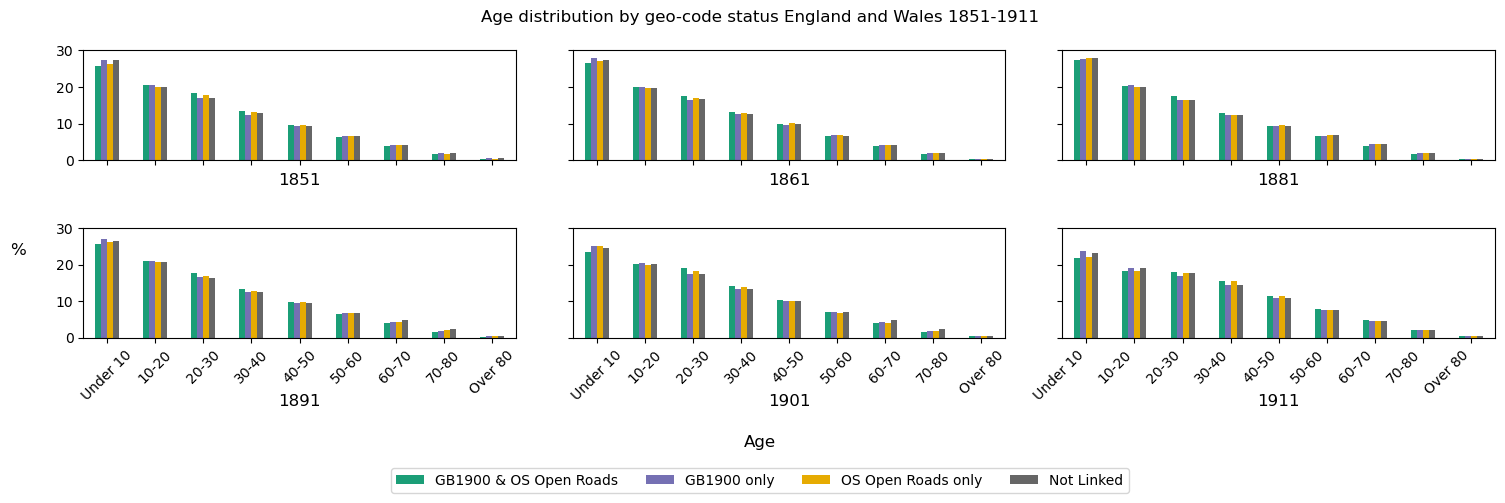

In [108]:
if analysis_country == "EW":
    sup_title = "Age distribution by geo-code status England and Wales 1851-1911"
    year_list = [1851,1861,1881,1891,1901,1911]
else:
    sup_title = "Age distribution by geo-code status Scotland 1851-1901"
    year_list = [1851,1861,1871,1881,1891,1901]


cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]
# cols_to_graph = ["linked","not_linked"]

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(15, 5))

fig.suptitle(sup_title)


y_ticks = [0,10,20,30]
marker = "o"
ylabel = "%"
xlabel = "Age"
rotation = 45
for iter, census_year in enumerate(year_list):
    if iter < 3:
        nrow = 0
        ncol = iter
        offset = -0.3
    else:
        nrow = 1
        ncol = iter - 3
        offset = -0.7
    subset = trial_age[trial_age["year"] == census_year]
    plt.xticks(rotation=45, ha='right')
    age_graph = subset.plot(ax=axes[nrow,ncol], x="Age_cut", y=cols_to_graph, yticks=y_ticks, rot=rotation, kind="bar",legend=0, colormap="Dark2")
    age_graph.set_title(census_year, y=offset)
    age_graph.set(xlabel=None)


fig.supxlabel('Age', y = 0.1)
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="lower center",ncols=4, bbox_to_anchor = (0.5,0))
plt.tight_layout()
plt.savefig(f"{analysis_country}_age_perc_graph.png", dpi = 300)

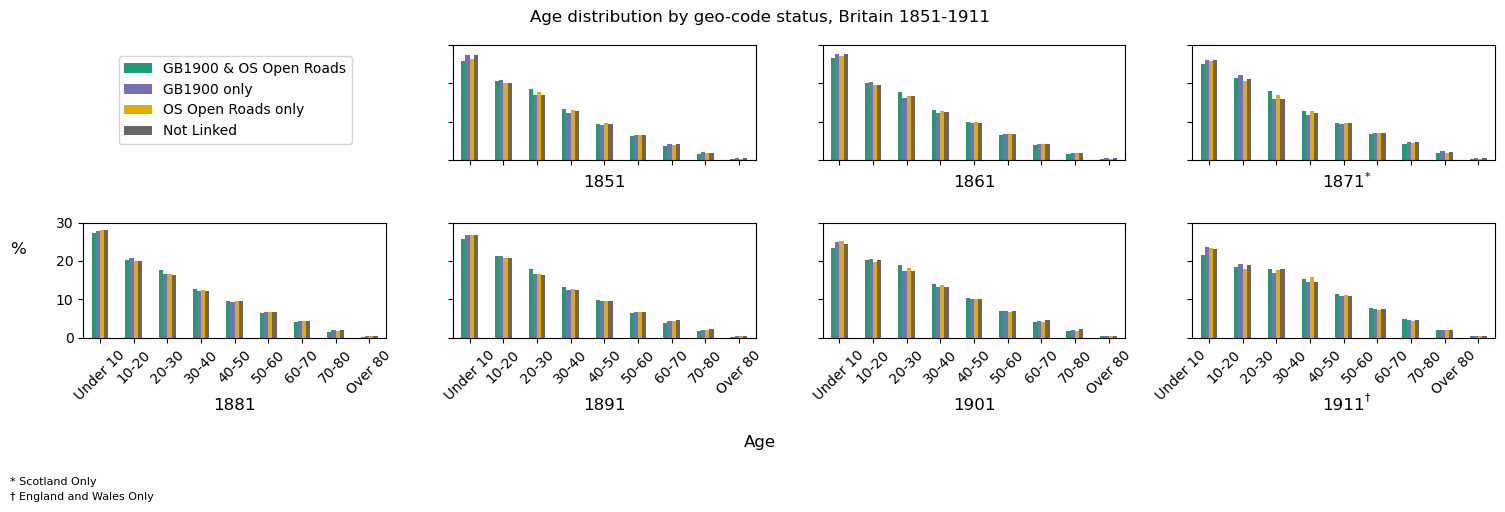

In [194]:
# GB analysis

sup_title = "Age distribution by geo-code status, Britain 1851-1911"
year_list = [2000,1851,1861,1871,1881,1891,1901,1911]



cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]
# cols_to_graph = ["linked","not_linked"]

fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(15, 5))

fig.suptitle(sup_title)


y_ticks = [0,10,20,30]
marker = "o"
ylabel = "%"
xlabel = "Age"
rotation = 45
for iter, census_year in enumerate(year_list):
    if iter == 0:
        axes[0, 0].axis("off")
    else:


        if iter < 4:
            nrow = 0
            ncol = iter
            offset = -0.3
        else:
            nrow = 1
            ncol = iter - 4
            offset = -0.7
        subset = trial_age[trial_age["year"] == census_year]
        plt.xticks(rotation=45, ha='right')
        age_graph = subset.plot(ax=axes[nrow,ncol], x="Age_cut", y=cols_to_graph, yticks=y_ticks, rot=rotation, kind="bar",legend=0, colormap="Dark2")
        age_graph.set_title(census_year, y=offset)
        age_graph.set(xlabel=None)



plt.figtext(0.903, 0.64, '*', fontsize=8)
plt.figtext(0.903, 0.20, '†', fontsize=8)
plt.figtext(0, 0.03, '* Scotland Only', fontsize=8)
plt.figtext(0, 0, '† England and Wales Only', fontsize=8)

fig.supxlabel('Age', y = 0.1)
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="center",ncols=1, bbox_to_anchor = (0.15,0.8))
plt.tight_layout()
plt.savefig(f"GB_age_perc_graph_{output_suffix}.png", dpi = 600, bbox_inches="tight")

In [195]:
# Sex
geocode_grouped_sex = geocode_census.groupby(["year", "geocode", "Sex"]).size()
g_graph_sex = (geocode_grouped_sex / geocode_grouped_sex.groupby(["year", "geocode"]).transform("sum") * 100)
trial_sex = g_graph_sex.unstack(level=1)

trial_sex= trial_sex.rename_axis(None, axis=1).reset_index()
trial_sex

,year,Sex,both,gb1900,not_linked,os_open_roads
0,1851,F,52.435710,49.888260,50.239563,51.692134
1,1851,M,44.761492,47.596756,46.813773,45.375306
2,1851,U,2.802798,2.514984,2.946664,2.932560
3,1861,F,53.004069,50.918060,50.296680,52.207631
4,1861,M,46.935383,49.026895,49.643341,47.723511
5,1861,U,0.060548,0.055045,0.059979,0.068858
6,1871,F,53.470633,51.564323,51.753168,53.329662
7,1871,M,46.528464,48.434677,48.237877,46.670338
8,1871,U,0.000903,0.001000,0.008955,NaN
9,1881,F,52.712385,50.581396,50.492020,51.659868


In [196]:
geocode_grouped_sex_1 = geocode_census.groupby(["year", "geocode_binary", "Sex"]).size()
g_graph_sex_1 = (geocode_grouped_sex_1 / geocode_grouped_sex_1.groupby(["year", "geocode_binary"]).transform("sum") * 100)
trial_sex_1 = g_graph_sex_1.unstack(level=1)

trial_sex_1= trial_sex_1.rename_axis(None, axis=1).reset_index()
trial_sex_1

,year,Sex,linked,not_linked
0,1851,F,51.297818,50.239563
1,1851,M,45.983234,46.813773
2,1851,U,2.718948,2.946664
3,1861,F,52.106699,50.296680
4,1861,M,47.832880,49.643341
5,1861,U,0.060421,0.059979
6,1871,F,52.729401,51.753168
7,1871,M,47.269853,48.237877
8,1871,U,0.000746,0.008955
9,1881,F,51.821328,50.492020


In [197]:
trial_sex1 = trial_sex.join(trial_sex_1[["linked"]]).copy()
trial_sex1

,year,Sex,both,gb1900,not_linked,os_open_roads,linked
0,1851,F,52.435710,49.888260,50.239563,51.692134,51.297818
1,1851,M,44.761492,47.596756,46.813773,45.375306,45.983234
2,1851,U,2.802798,2.514984,2.946664,2.932560,2.718948
3,1861,F,53.004069,50.918060,50.296680,52.207631,52.106699
4,1861,M,46.935383,49.026895,49.643341,47.723511,47.832880
5,1861,U,0.060548,0.055045,0.059979,0.068858,0.060421
6,1871,F,53.470633,51.564323,51.753168,53.329662,52.729401
7,1871,M,46.528464,48.434677,48.237877,46.670338,47.269853
8,1871,U,0.000903,0.001000,0.008955,NaN,0.000746
9,1881,F,52.712385,50.581396,50.492020,51.659868,51.821328


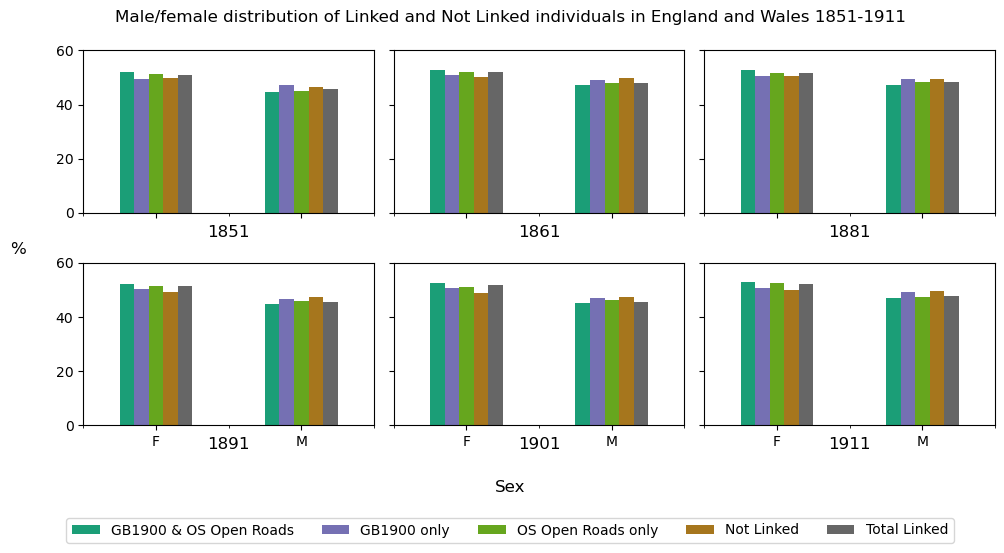

In [168]:
if analysis_country == "EW":
    sup_title = "Male/female distribution of Linked and Not Linked individuals in England and Wales 1851-1911"
    year_list = [1851,1861,1881,1891,1901,1911]
else:
    sup_title = "Male/female distribution of Linked and Not Linked individuals in Scotland 1851-1901"
    year_list = [1851,1861,1871,1881,1891,1901]

cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked", "linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked", "Total Linked"]
# cols_to_graph = ["linked","not_linked"]

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(10, 5))

fig.suptitle(sup_title)


y_ticks = [0,20,40,60]
for iter, census_year in enumerate(year_list):
    if iter < 3:
        nrow = 0
        ncol = iter
    else:
        nrow = 1
        ncol = iter - 3
    subset = trial_sex1[(trial_sex1["year"] == census_year) & (trial_sex1["Sex"] != "U")]

    sex_graph = subset.plot(ax=axes[nrow,ncol], x="Sex", y=cols_to_graph, yticks=y_ticks,kind="bar",legend=0, rot=0, colormap="Dark2")
    sex_graph.set_title(census_year, y=-0.2)

    sex_graph.set(xlabel=None)


fig.supxlabel('Sex')
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="lower center",ncols=5, bbox_to_anchor = (0.5,-0.1))
plt.tight_layout()
plt.savefig(f"{analysis_country}_sex_perc_graph.png", dpi = 300,bbox_inches='tight')

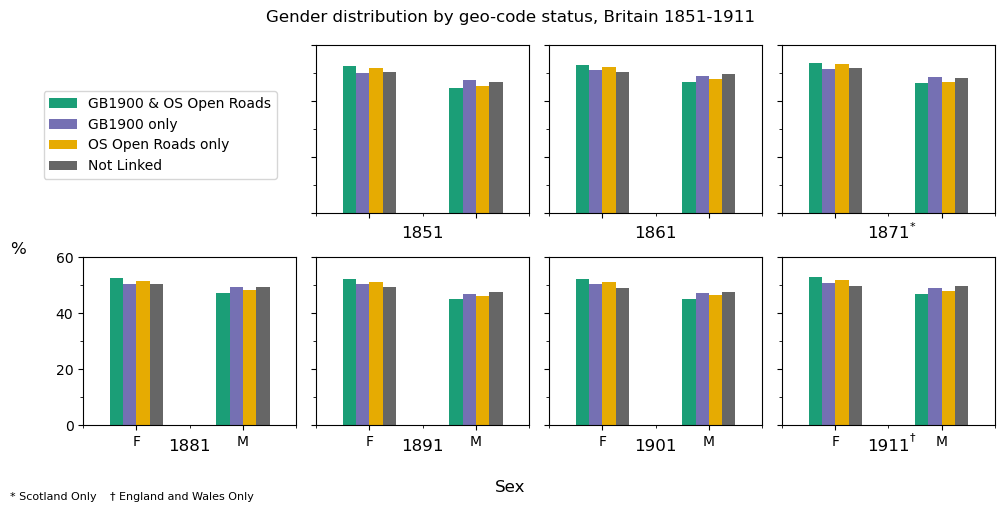

In [246]:

# GB analysis


sup_title = "Gender distribution by geo-code status, Britain 1851-1911"
year_list = [2000,1851,1861,1871,1881,1891,1901,1911]


cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]
# cols_to_graph = ["linked","not_linked"]

fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(10, 5))

fig.suptitle(sup_title)


y_ticks = [0,20,40,60]
for iter, census_year in enumerate(year_list):
    if iter == 0:
        axes[0, 0].axis("off")
    else:
        if iter < 4:
            nrow = 0
            ncol = iter
        else:
            nrow = 1
            ncol = iter - 4
        subset = trial_sex1[(trial_sex1["year"] == census_year) & (trial_sex1["Sex"] != "U")]

        sex_graph = subset.plot(ax=axes[nrow,ncol], x="Sex", y=cols_to_graph, yticks=y_ticks,kind="bar",legend=0, rot=0, colormap="Dark2")
        sex_graph.set_title(census_year, y=-0.2)

        sex_graph.set(xlabel=None)





fig.supxlabel('Sex')
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="center",ncols=1, bbox_to_anchor = (0.15,0.73))

plt.figtext(0.9, 0.54, '*', fontsize=8)
plt.figtext(0.9, 0.12, '†', fontsize=8)
plt.figtext(0, 0, '* Scotland Only', fontsize=8)
plt.figtext(0.1, 0, '† England and Wales Only', fontsize=8)

plt.tight_layout()
plt.savefig(f"GB_sex_perc_graph_{output_suffix}.png", dpi = 300,bbox_inches='tight')

In [9]:
geocode_census["yr_parid"] = geocode_census["year"].astype(str) + "_" + geocode_census["ParID"].astype(str)
geocode_census

,RecID,ParID,Country,Sex,Age,Occode,Servts,geocode,country,year,yr_parid
0,1,100001,SCT,M,81.0,774.0,0.0,gb1900,SCOT,1871,1871_100001
1,2,100001,SCT,F,78.0,NaN,0.0,gb1900,SCOT,1871,1871_100001
2,3,100001,SCT,F,53.0,181.0,0.0,gb1900,SCOT,1871,1871_100001
3,4,100001,SCT,F,45.0,181.0,0.0,gb1900,SCOT,1871,1871_100001
4,5,100001,SCT,M,8.0,787.0,0.0,gb1900,SCOT,1871,1871_100001
...,...,...,...,...,...,...,...,...,...,...,...
15542653,4438427,100882,SCT,M,5.0,787.0,2.0,gb1900,SCOT,1901,1901_100882
15542654,4438428,100882,SCT,F,1.0,999.0,2.0,gb1900,SCOT,1901,1901_100882
15542655,4438429,100882,SCT,F,70.0,659.0,0.0,gb1900,SCOT,1901,1901_100882
15542656,4438430,100882,SCT,F,19.0,101.0,0.0,gb1900,SCOT,1901,1901_100882


In [7]:
geocode_grouped = geocode_census.groupby(["year", "geocode"]).size()
g_graph = (geocode_grouped / geocode_grouped.groupby("year").transform("sum") * 100)
g_graph.info()

<class 'pandas.core.series.Series'>
MultiIndex: 28 entries, (1851, 'both') to (1911, 'os_open_roads')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
28 non-null     float64
dtypes: float64(1)
memory usage: 477.0+ bytes


In [8]:
trial = g_graph.unstack()
trial["total_linked"] = 100 - trial["not_linked"]
trial= trial.rename_axis(None, axis=1)
trial

,both,gb1900,not_linked,os_open_roads,total_linked
year,,,,,
1851,21.271549,20.274534,47.474896,10.979021,52.525104
1861,24.690704,19.673084,43.474501,12.161711,56.525499
1871,26.461822,23.873347,36.004205,13.660627,63.995795
1881,29.562809,19.686685,38.639060,12.111445,61.360940
1891,38.240977,17.831256,29.273633,14.654134,70.726367
1901,40.898171,17.005975,26.509250,15.586605,73.490750
1911,33.616120,28.155437,28.845895,9.382548,71.154105


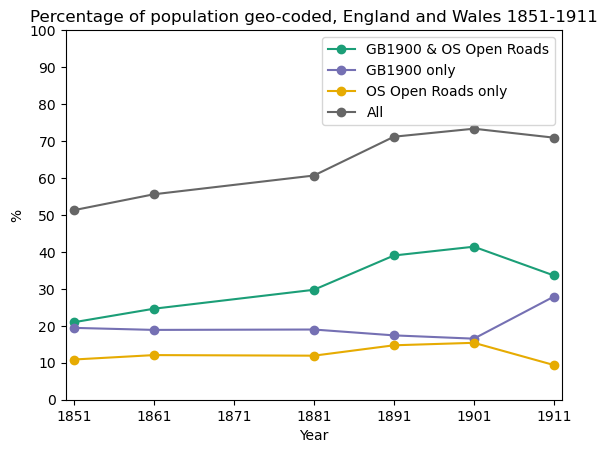

In [12]:
if analysis_country == "EW":
    graph_title = "Percentage of population geo-coded, England and Wales 1851-1911"
    x_min = 1850
    x_max = 1912
    x_ticks = [1851,1861,1871,1881,1891,1901,1911]
else:
    graph_title = "Percentage of population geo-coded, Scotland 1851-1901"
    x_min = 1850
    x_max = 1902
    x_ticks = [1851,1861,1871,1881,1891,1901]

y_min = 0
y_max = 100
y_ticks = [0,10,20,30,40,50,60,70,80,90,100]

marker = "o"
ylabel = "%"
xlabel = "Year"
this = trial.drop("not_linked",axis=1).plot(title=graph_title, ylim=(y_min,y_max),
                                        yticks=y_ticks,
                                        xlim=(x_min,x_max),
                                        xticks=x_ticks,
                                        marker=marker,
                                        ylabel=ylabel,
                                        xlabel=xlabel,
                                        colormap="Dark2")
# plt.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"])
this.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"])
# plt.savefig(f"{analysis_country}_summary_perc_graph.png", dpi = 600)

<class 'matplotlib.axes._subplots.AxesSubplot'>


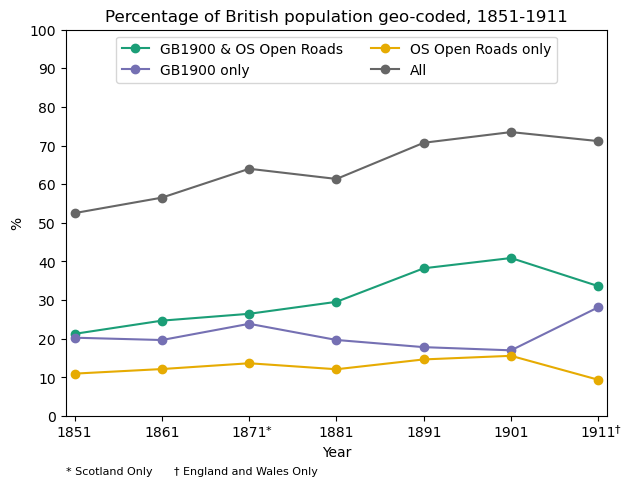

In [9]:

graph_title = "Percentage of British population geo-coded, 1851-1911"
x_min = 1850
x_max = 1912
x_ticks = [1851,1861,1871,1881,1891,1901,1911]

y_min = 0
y_max = 100
y_ticks = [0,10,20,30,40,50,60,70,80,90,100]

marker = "o"
ylabel = "%"
xlabel = "Year"
this = trial.drop("not_linked",axis=1).plot(title=graph_title, ylim=(y_min,y_max),
                                        yticks=y_ticks,
                                        xlim=(x_min,x_max),
                                        xticks=x_ticks,
                                        marker=marker,
                                        ylabel=ylabel,
                                        xlabel=xlabel,
                                        colormap="Dark2")
# plt.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"])
this.legend(labels=["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "All"], ncols = 2, loc = "upper center")
print(type(this))
this.text(0.37, -0.045, '*', transform=this.transAxes,fontsize=8)
this.text(1.015, -0.04, '†', transform=this.transAxes, fontsize=8)
plt.figtext(0, -0.15, '* Scotland Only', transform=this.transAxes,fontsize=8)
plt.figtext(0.2, -0.15, '† England and Wales Only', transform=this.transAxes, fontsize=8)

plt.tight_layout()
plt.savefig(f"GB_summary_perc_graph_{output_suffix}_v2.png", dpi = 600, bbox_inches="tight")

In [125]:
g_graph = g_graph.reset_index().rename(columns={0:"perc"})
g_graph

,year,geocode,perc
0,1851,both,21.271549
1,1851,gb1900,20.243161
2,1851,not_linked,47.506269
3,1851,os_open_roads,10.979021
4,1861,both,24.690704
5,1861,gb1900,19.673084
6,1861,not_linked,43.474501
7,1861,os_open_roads,12.161711
8,1871,both,26.461822
9,1871,gb1900,23.873347


In [30]:
trial = g_graph.query('geocode == "not_linked"')[["perc"]]
100 - trial

,perc
2,69.035661
6,70.167531
10,71.815318
14,72.519063
18,75.268641
22,80.715002


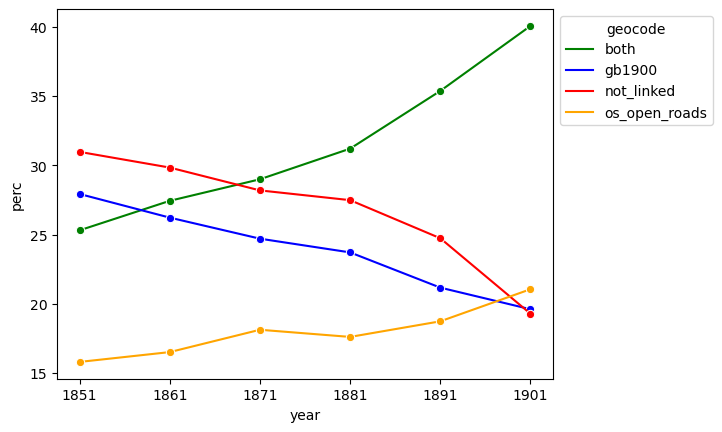

In [9]:
g = sns.lineplot(g_graph, x="year", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"])
# g.set_xticks([1851,1861,1871,1881,1891,1901,1911])
# g.set_xticklabels([1851,1861,1871,1881,1891,1901,1911])
g.set_xticks([1851, 1861, 1871, 1881,1891,1901])
g.set_xticklabels([1851, 1861, 1871, 1881,1891,1901])
sns.move_legend(g, "upper left", bbox_to_anchor = (1,1))

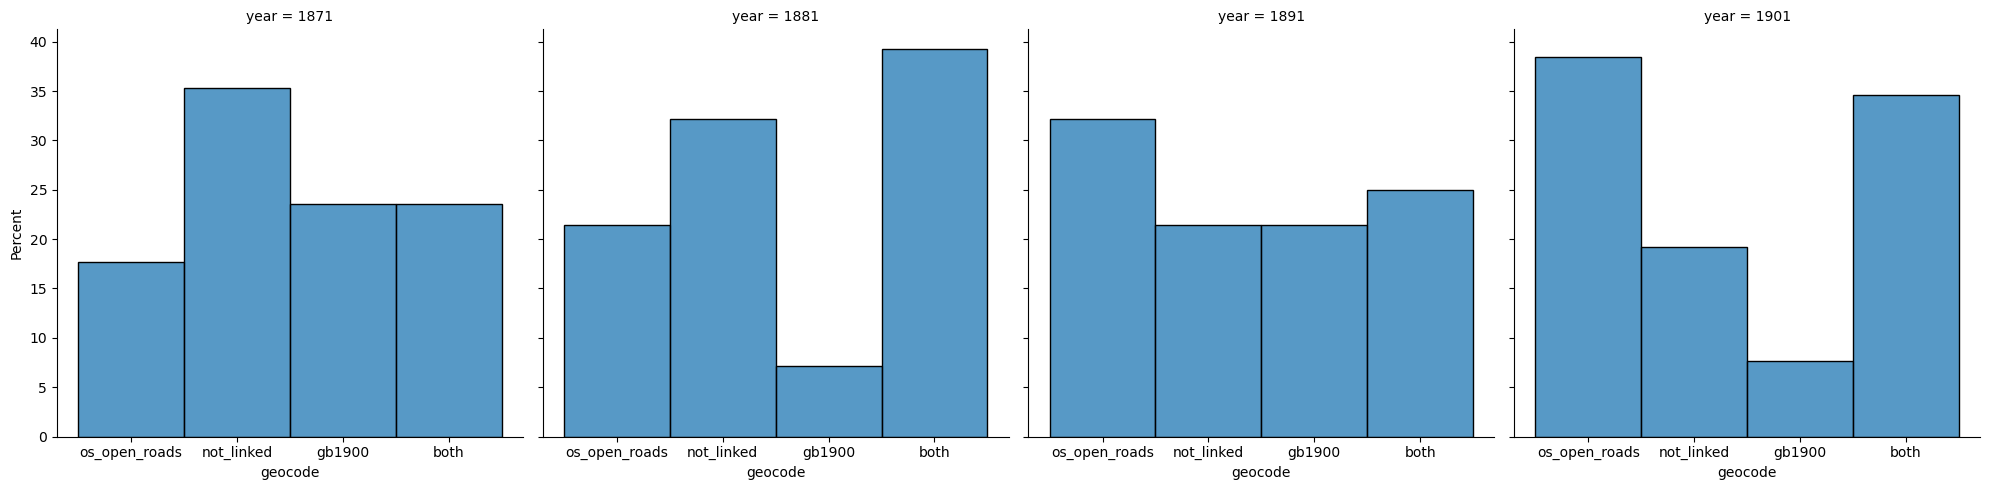

In [14]:
sns.displot(data=geocode_census.sample(100), x="geocode", stat = "percent", col="year", common_norm = False)

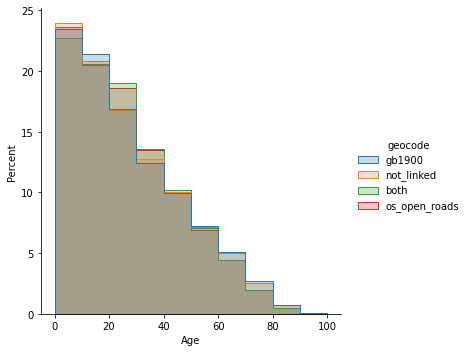

In [12]:
sns.displot(data=geocode_census, x="Age", hue="geocode", element= "step", stat = "percent", common_norm = False, bins = [0,10,20,30,40,50,60,70,80,90,100])

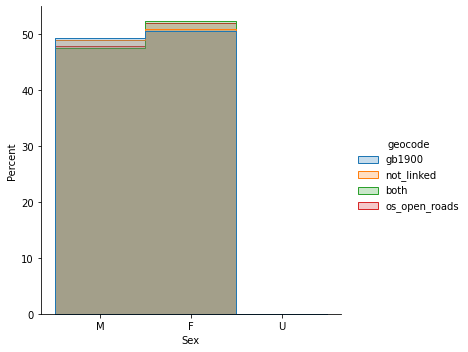

In [13]:
sns.displot(data=geocode_census, x="Sex", hue="geocode", element= "step", stat = "percent", common_norm = False)

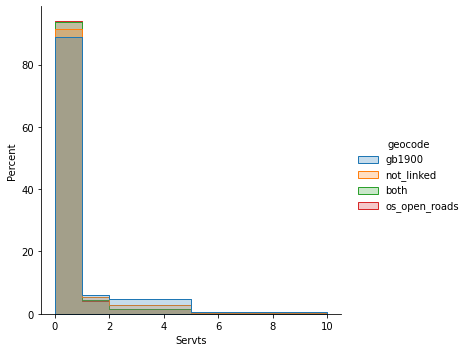

In [15]:
sns.displot(data=geocode_census, x="Servts", hue="geocode", element= "step", stat = "percent", common_norm = False, bins = [0, 1, 2, 5, 10])

In [74]:
list_of_cols = ['ParID','Urban_Class','TOWN']
for year in [1851,1861,1881,1891,1901,1911]:
	urban_classification = pd.read_excel('/Users/jrhodes/Downloads/England_Wales_Urban_Classification_1851_1911.xlsx',sheet_name=f"{year}",usecols=list_of_cols)

	urban_classification["yr_parid"] = f"{year}_" + urban_classification["ParID"].astype(str)
	# print(urban_classification)
	urban_classification_dict = dict(zip(urban_classification['yr_parid'],urban_classification['Urban_Class']))

	geocode_census['urban_class'] = geocode_census['yr_parid'].map(urban_classification_dict).fillna(geocode_census["urban_class"])
geocode_census["urban_class"] = geocode_census["urban_class"].map({1:"urban", 2:"urban_transition", 3:"rural_transition", 4:"rural"})

In [154]:
geocode_grouped_geog = geocode_census.groupby(["year", "geocode", "urban_class"]).size()
g_graph_geog = (geocode_grouped_geog / geocode_grouped_geog.groupby(["year","urban_class"]).transform("sum") * 100)
g_graph_geog = g_graph_geog.reset_index().rename(columns={0:"perc"})

In [155]:
g_graph_geog["urban_class"] = pd.Categorical(g_graph_geog["urban_class"],categories=["urban","urban_transition","rural_transition","rural"])
print(g_graph_geog)

    year        geocode       urban_class       perc
0   1851           both             rural  12.941714
1   1851           both  rural_transition  24.129381
2   1851           both             urban  32.022271
3   1851           both  urban_transition  18.629248
4   1851         gb1900             rural  27.567991
..   ...            ...               ...        ...
91  1911     not_linked  urban_transition  43.520694
92  1911  os_open_roads             rural  27.122645
93  1911  os_open_roads  rural_transition  35.188947
94  1911  os_open_roads             urban  34.764487
95  1911  os_open_roads  urban_transition  32.371545

[96 rows x 4 columns]


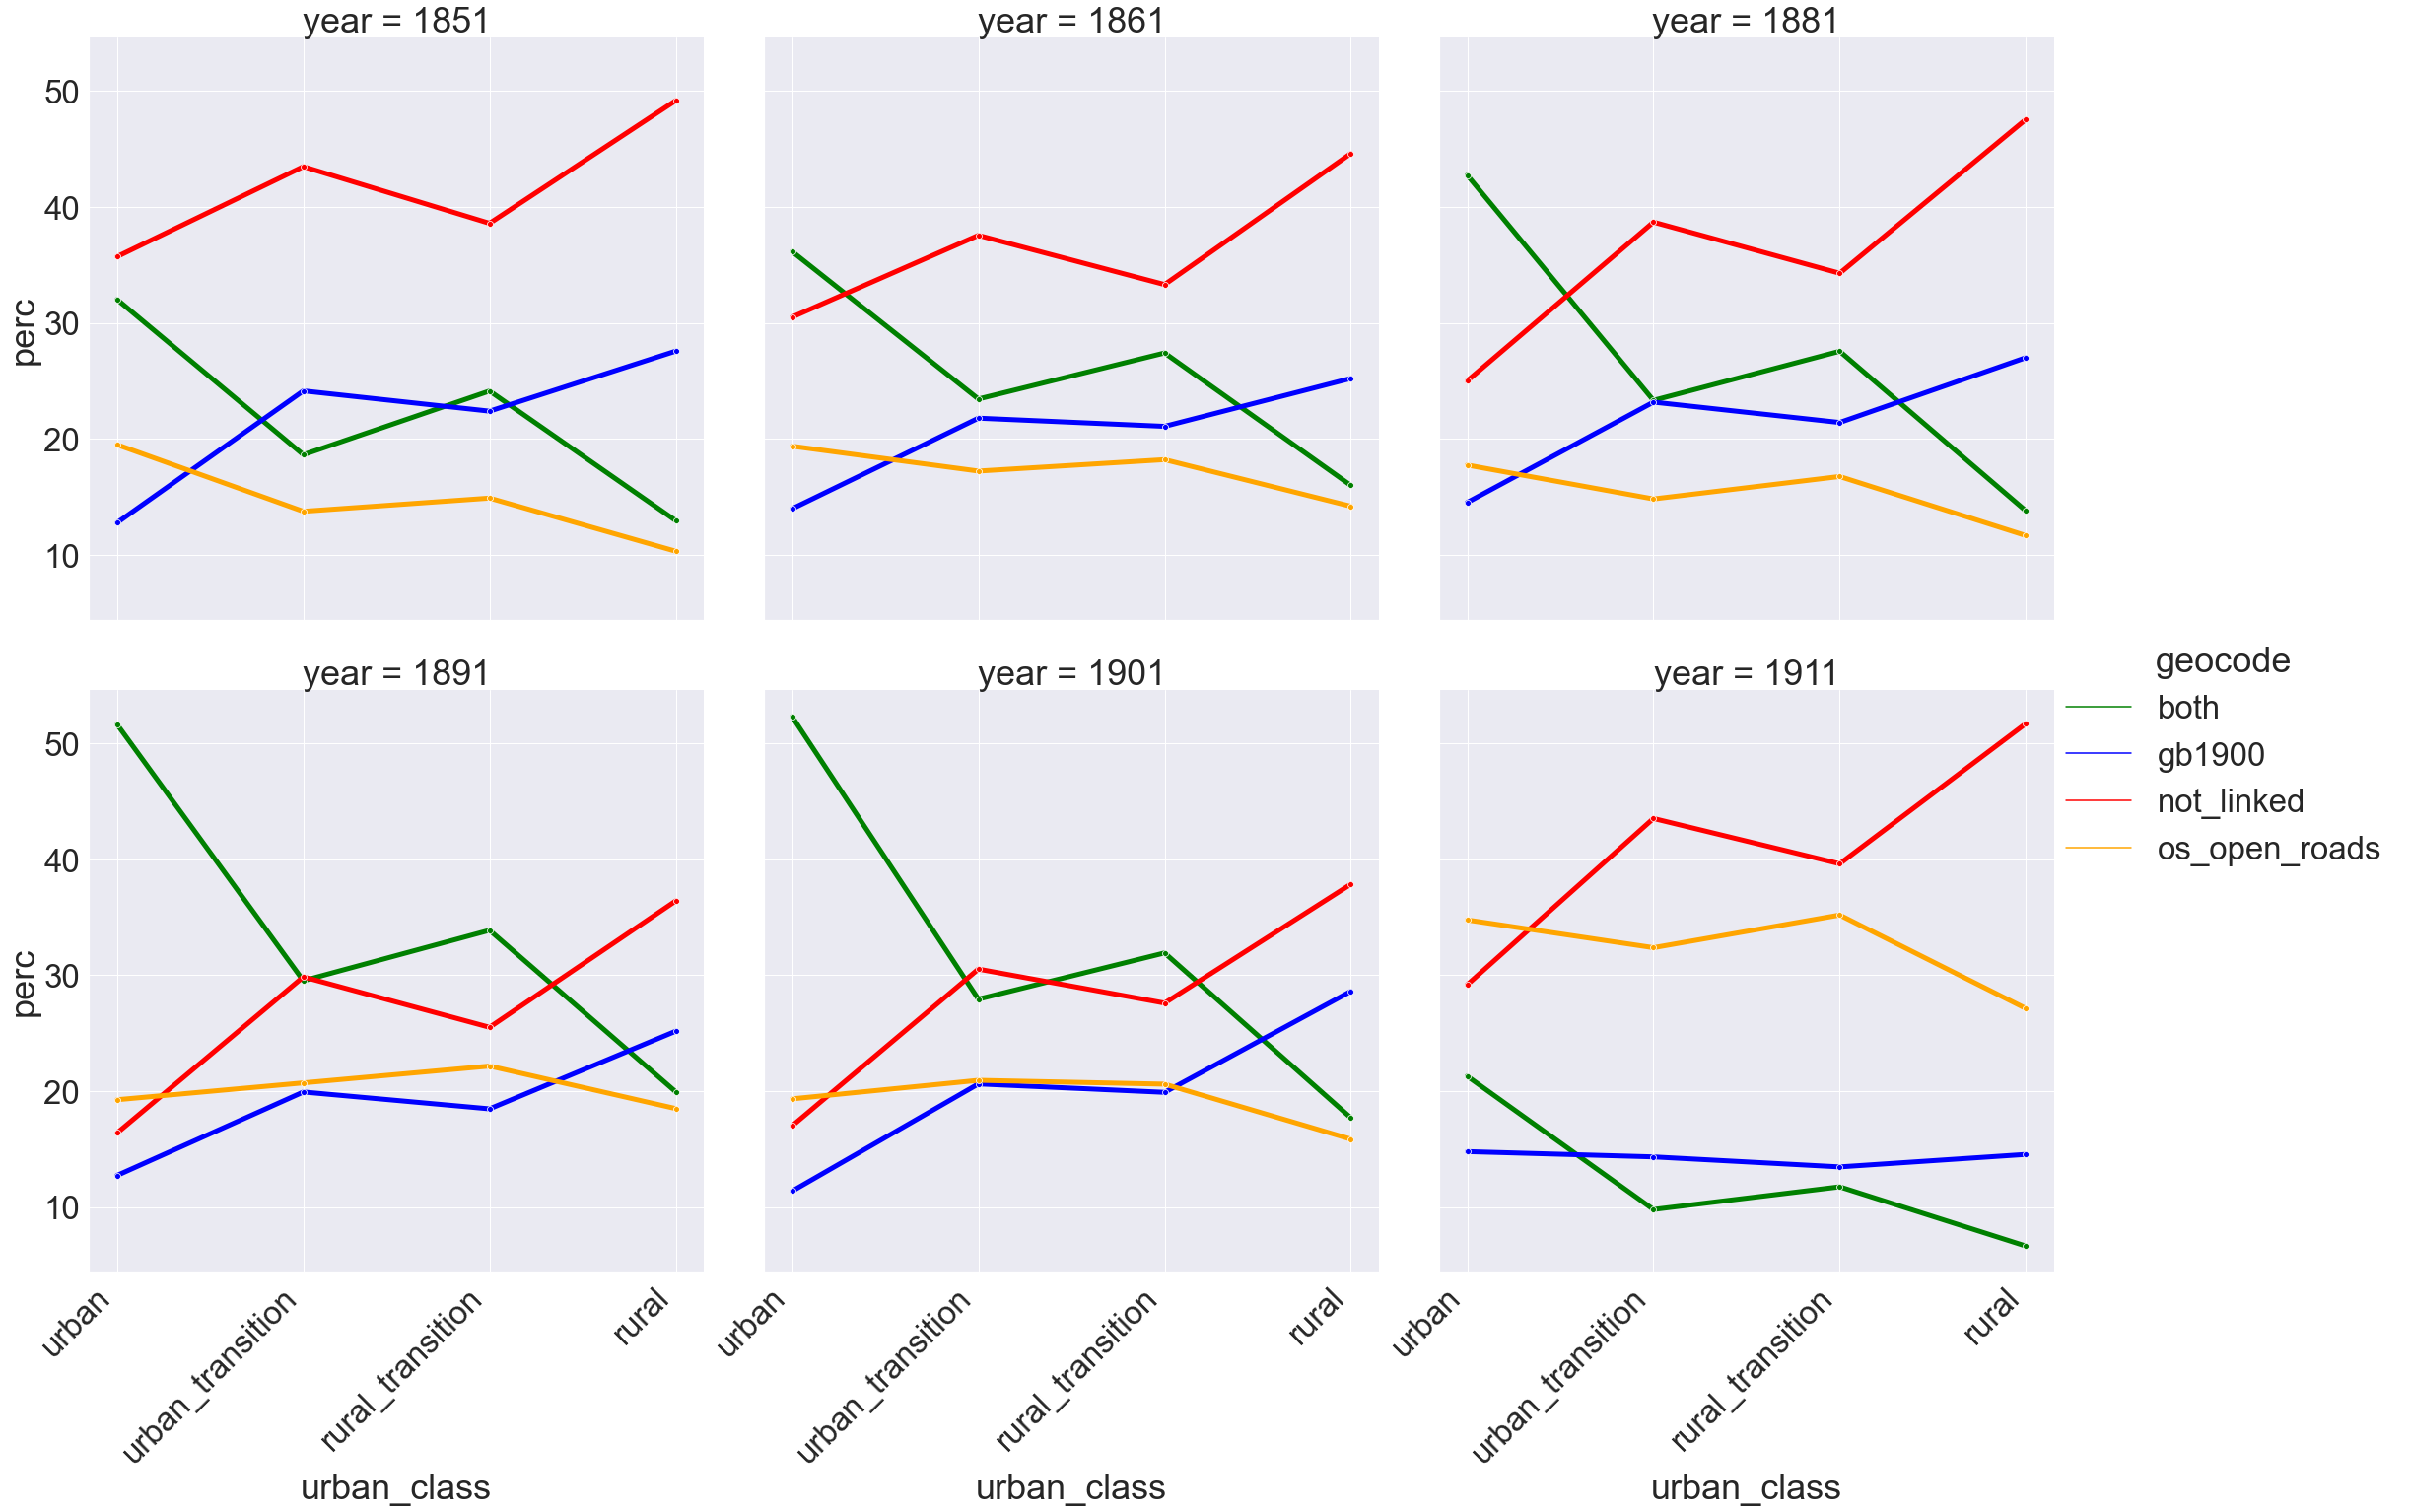

In [157]:
sns.set(font_scale = 3)
g2 = sns.relplot(g_graph_geog, x="urban_class", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"],col="year", kind="line",height=10 , aspect=1, lw=5,col_wrap=3).set_xticklabels(rotation=45, horizontalalignment='right')
# g2.set_xticks([1851,1861,1871,1881,1891,1901,1911])
# g2.set_xticklabels([1851,1861,1871,1881,1891,1901,1911])
# sns.move_legend(g2, "upper left", bbox_to_anchor = (1,1))
# sns.displot(data=g_graph_geog, x="urban_class", hue="geocode", element= "step").set_xticklabels(rotation=45, horizontalalignment='right')

In [6]:
bbce_codes = pd.read_excel("analysis/I-CeMOccode_1881EW_51EA_17EA_PST_SIC Final.xlsx", sheet_name="Sheet1", usecols=["OCCODE","17cat_mod", "51cat"])

cat17 = dict(zip(bbce_codes["OCCODE"], bbce_codes["17cat_mod"]))
# cat51 = dict(zip(bbce_codes["OCCODE"], bbce_codes["51cat"]))



geocode_census["17cat"] = geocode_census["Occode"].map(cat17)
# geocode_census["51cat"] = geocode_census["Occode"].map(cat51)

In [7]:
geocode_grouped_occ = geocode_census.groupby(["year", "geocode", "17cat"]).size()
g_graph_occ = (geocode_grouped_occ / geocode_grouped_occ.groupby(["year","geocode"]).transform("sum") * 100)
# g_graph_occ = g_graph_occ.reset_index().rename(columns={0:"perc"})
# g_graph_occ = g_graph_occ.pivot(columns="17cat", values="perc")
g_graph_occ

year  geocode        17cat                                
1851  both           Agric produce processing & dealing        0.754177
                     Construction                              4.095253
                     Domestic service                         10.096570
                     Farming/estate work                       7.961579
                     Finance & commerce                        0.611787
                                                                ...    
1911  os_open_roads  Public admin, military, clergy            2.686481
                     Refreshment                               1.932402
                     Retail                                    3.990156
                     Transport                                 6.009696
                     Undefined general & factory labourers     2.899561
Length: 476, dtype: float64

In [8]:

g_graph_occ2 = g_graph_occ.reset_index()
g_graph_occ2 = g_graph_occ2.pivot(index = ["year", "17cat"],columns = "geocode", values = 0).reset_index()
g_graph_occ2

geocode,year,17cat,both,gb1900,not_linked,os_open_roads
0,1851,Agric produce processing & dealing,0.754177,0.604037,0.676247,0.800724
1,1851,Construction,4.095253,3.186116,3.870053,4.334144
2,1851,Domestic service,10.096570,9.007262,7.761097,8.753857
3,1851,Farming/estate work,7.961579,22.649847,16.218151,9.323307
4,1851,Finance & commerce,0.611787,0.249196,0.356207,0.512327
...,...,...,...,...,...,...
114,1911,"Public admin, military, clergy",2.709696,2.288195,2.462078,2.686481
115,1911,Refreshment,2.051957,1.648221,1.813719,1.932402
116,1911,Retail,4.096393,2.804107,3.045814,3.990156
117,1911,Transport,5.652358,5.348931,6.116213,6.009696


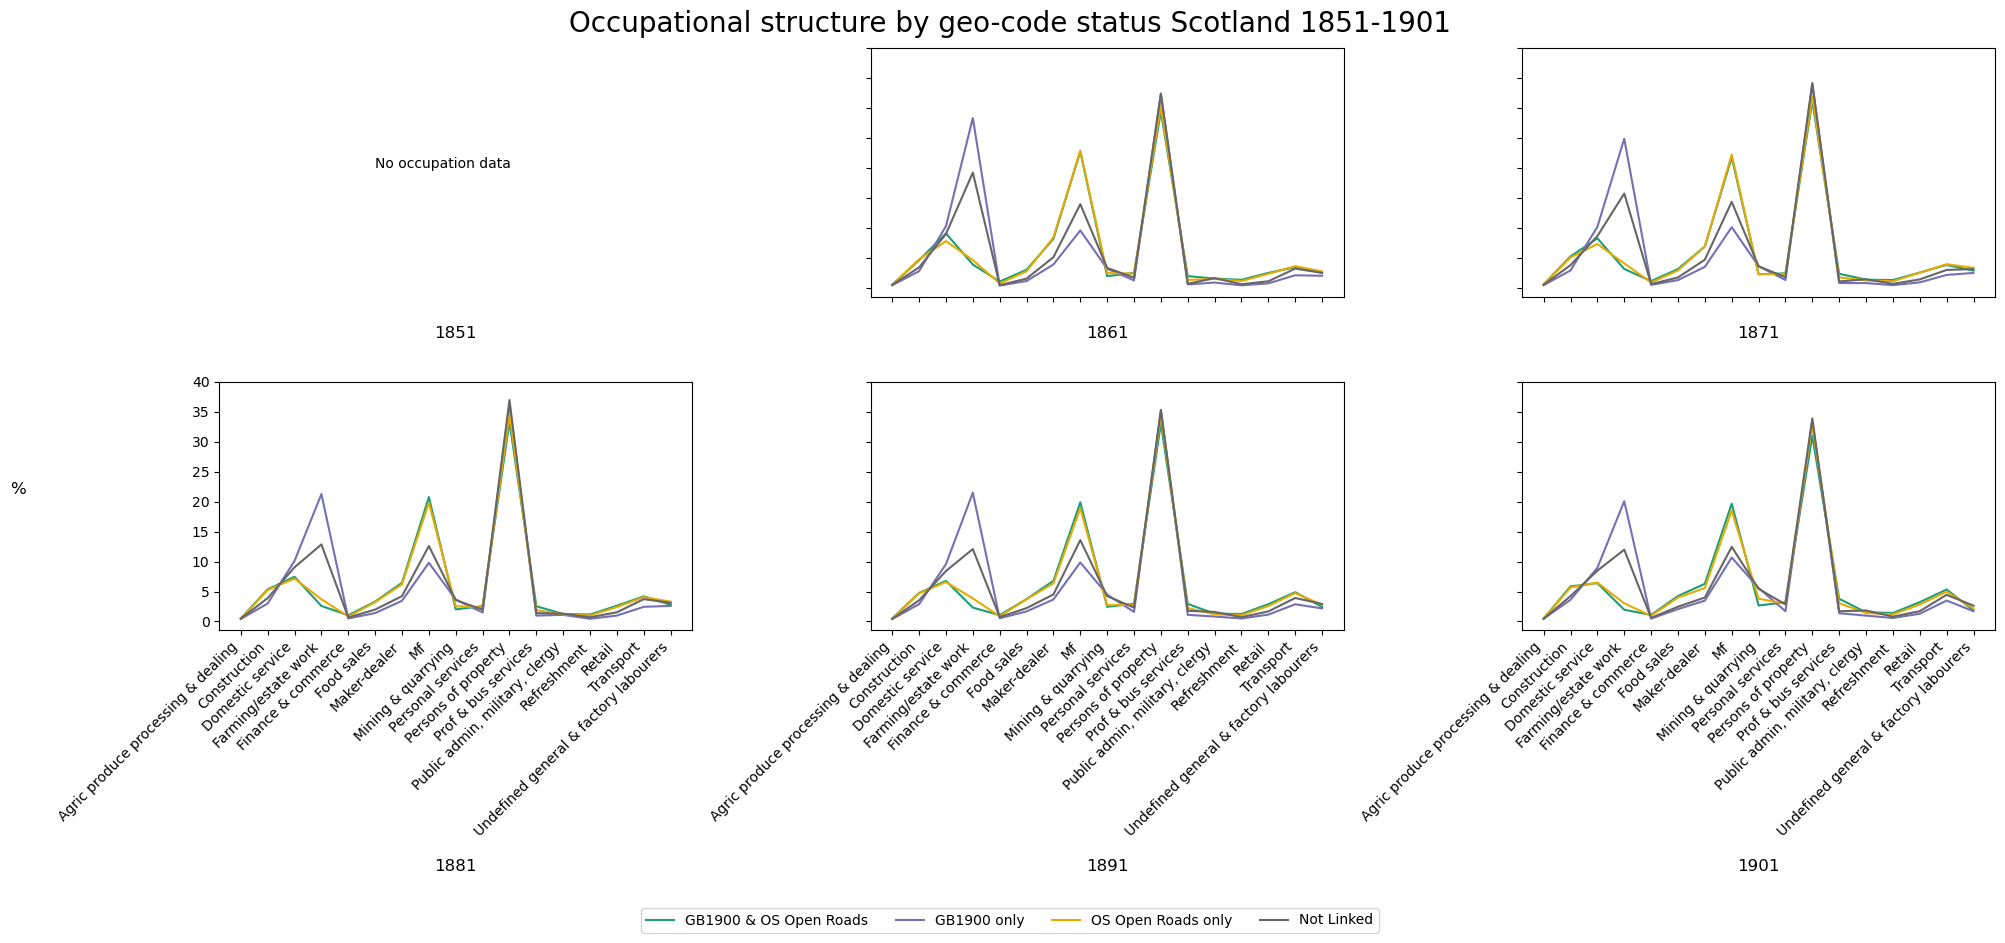

In [153]:
if analysis_country == "EW":
    graph_title = "Occupational structure by geo-code status England and Wales 1851-1911"

    year_list = [1851,1861,1881,1891,1901,1911]
else:
    graph_title = "Occupational structure by geo-code status Scotland 1851-1901"

    year_list = [1851,1861,1871,1881,1891,1901]



fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(20, 10))
xticks = ['Agric produce processing & dealing', 'Construction', 'Domestic service', 'Farming/estate work', 'Finance & commerce', 'Food sales', 'Maker-dealer', 'Mf', 'Mining & quarrying', 'Personal services', 'Persons of property', 'Prof & bus services', 'Public admin, military, clergy', 'Refreshment', 'Retail', 'Transport', 'Undefined general & factory labourers']

fig.suptitle(graph_title, fontsize = 20)


cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]

labels = ["both", "gb1900", "os_open_roads", "not_linked"]
labels_d = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]

y_ticks = [0,5,10,15,20,25,30,35,40]
for iter, census_year in enumerate(year_list):
    if iter < 3:
        nrow = 0
        ncol = iter
        title_loc = -0.2
    else:
        nrow = 1
        ncol = iter - 3
        title_loc = -1
    subset = g_graph_occ2[g_graph_occ2["year"] == census_year]
    # subset_g = subset.groupby("geocode")
    # if census_year == 1851:
    #     axes[nrow,ncol].axis("off")
    # else:
    if census_year == 1851 and analysis_country == "SCOT":
        axes[nrow,ncol].set_title(census_year, y=title_loc)
        axes[nrow, ncol].axis("off")
        axes[nrow, ncol].text(x = 5, y=20, s = "No occupation data")

    else:

        occ_graph = subset.plot(ax=axes[nrow,ncol], x = "17cat", y=cols_to_graph, yticks=y_ticks, xticks = range(0,17),rot=45, legend=0, colormap="Dark2")
        occ_graph.set_title(census_year, y=title_loc)
        occ_graph.set(xlabel=None)
        # occ_graph.set_yticklabels(horizontalalignment='right')

        occ_graph.set_xticklabels(labels = xticks, horizontalalignment='right')
# fig.supxlabel('Occupational Group', y = 0.1, fontsize = 14)
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="lower center",ncols=4, bbox_to_anchor = (0.5,0.05))

plt.tight_layout()
# plt.savefig(f"{analysis_country}_occ_perc_graph.png", dpi = 300,bbox_inches='tight')

1851
1861
1871
1881
1891
1901
1911


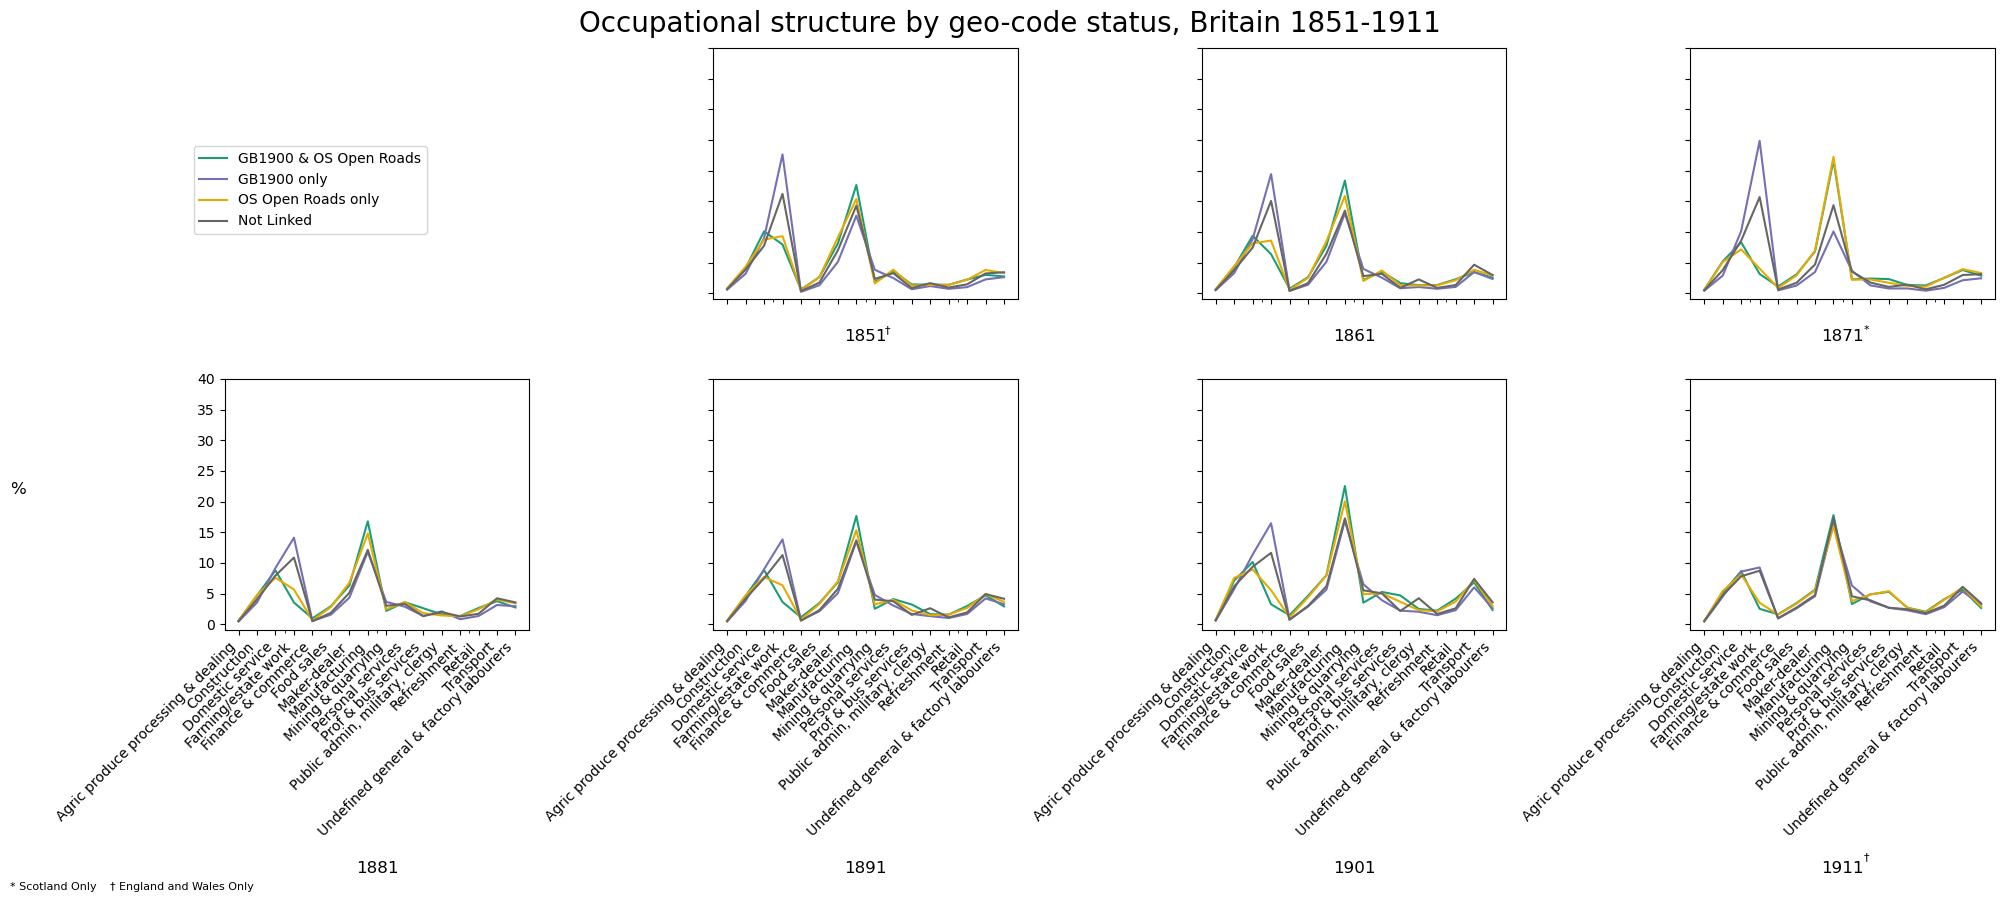

In [12]:
# GB analysis


graph_title = "Occupational structure by geo-code status, Britain 1851-1911"

year_list = [2000,1851,1861,1871,1881,1891,1901,1911]




fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True,figsize=(20, 10))
xticks = ['Agric produce processing & dealing', 'Construction', 'Domestic service', 'Farming/estate work', 'Finance & commerce', 'Food sales', 'Maker-dealer', 'Manufacturing', 'Mining & quarrying', 'Personal services', 'Prof & bus services', 'Public admin, military, clergy', 'Refreshment', 'Retail', 'Transport', 'Undefined general & factory labourers']

fig.suptitle(graph_title, fontsize = 20)


cols_to_graph = ["both", "gb1900", "os_open_roads", "not_linked"]
col_pretty_names = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]

labels = ["both", "gb1900", "os_open_roads", "not_linked"]
labels_d = ["GB1900 & OS Open Roads", "GB1900 only", "OS Open Roads only", "Not Linked"]

y_ticks = [0,5,10,15,20,25,30,35,40]
for iter, census_year in enumerate(year_list):
    if iter < 4:
        nrow = 0
        ncol = iter
        title_loc = -0.2
    else:
        nrow = 1
        ncol = iter - 4
        title_loc = -1
    subset = g_graph_occ2[(g_graph_occ2["year"] == census_year) & (g_graph_occ2["17cat"] != "Other")]
    # subset_g = subset.groupby("geocode")
    # if census_year == 1851:
    #     axes[nrow,ncol].axis("off")
    # else:
    if census_year == 2000:
        # axes[nrow,ncol].set_title(census_year, y=title_loc)
        axes[nrow, ncol].axis("off")
        # axes[nrow, ncol].text(x = 5, y=20, s = "No occupation data")

    else:
        print(census_year)
        occ_graph = subset.plot(ax=axes[nrow,ncol], x = "17cat", y=cols_to_graph, yticks=y_ticks, xticks = range(0,16),rot=45, legend=0, colormap="Dark2")
        occ_graph.set_title(census_year, y=title_loc)
        occ_graph.set(xlabel=None)
    # occ_graph.set_yticklabels(horizontalalignment='right')

        occ_graph.set_xticklabels(labels = xticks, horizontalalignment='right')
# fig.supxlabel('Occupational Group', y = 0.1, fontsize = 14)
fig.supylabel('%',rotation="horizontal", x = 0)
fig.legend(labels=col_pretty_names,loc="center",ncols=1, bbox_to_anchor = (0.15,0.8))


plt.figtext(0.927, 0.657, '*', fontsize=8)
plt.figtext(0.4373, 0.657, '†', fontsize=8)
plt.figtext(0.927, 0.13, '†', fontsize=8)
plt.figtext(0, 0.1, '* Scotland Only', fontsize=8)
plt.figtext(0.05, 0.1, '† England and Wales Only', fontsize=8)

plt.tight_layout()
plt.savefig(f"GB_occ_perc_graph_{output_suffix}.png", dpi = 300,bbox_inches='tight')

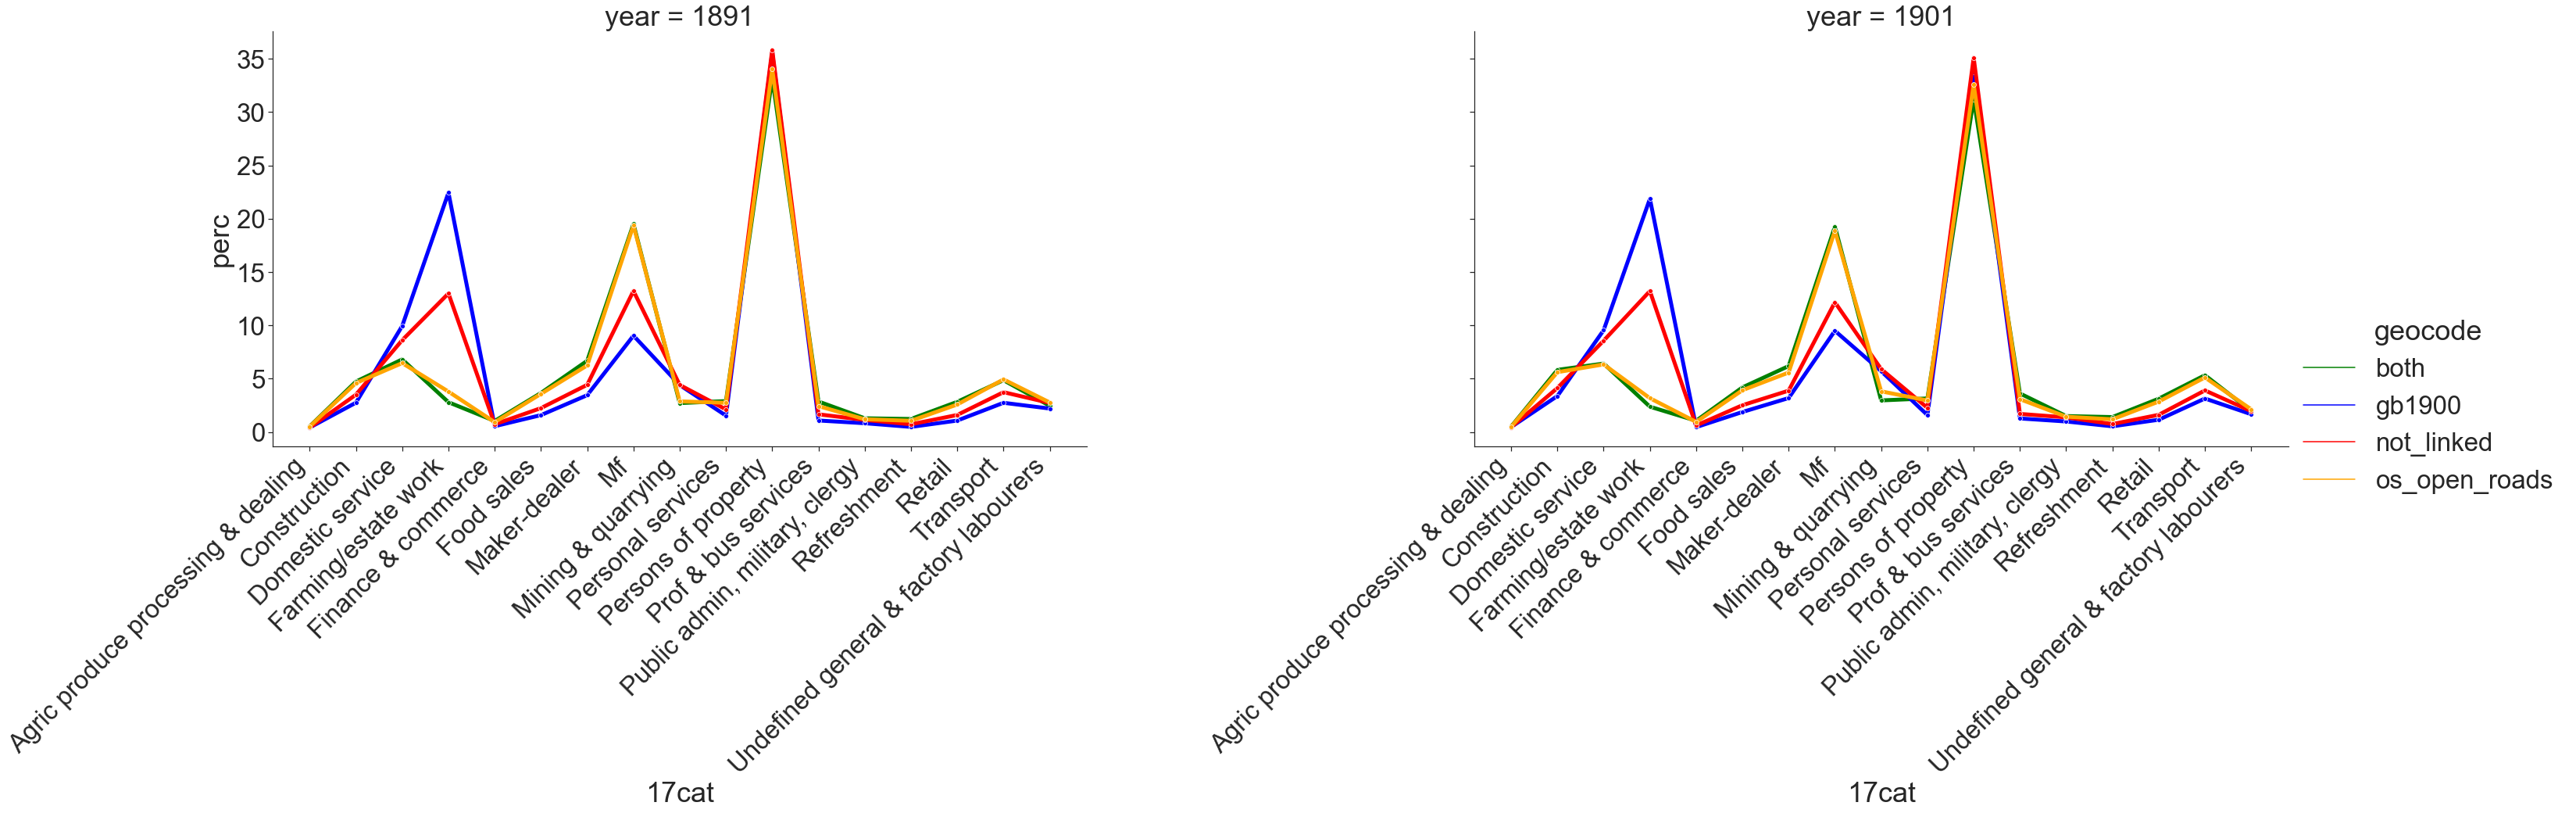

In [14]:
sns.set(font_scale = 3, style="ticks")
g3 = sns.relplot(g_graph_occ, x="17cat", y = "perc", hue="geocode", marker="o", palette=["green","blue","red","orange"],col="year", kind="line",height=10 , aspect=2, lw=5,col_wrap=2).set_xticklabels(rotation=45, horizontalalignment='right')

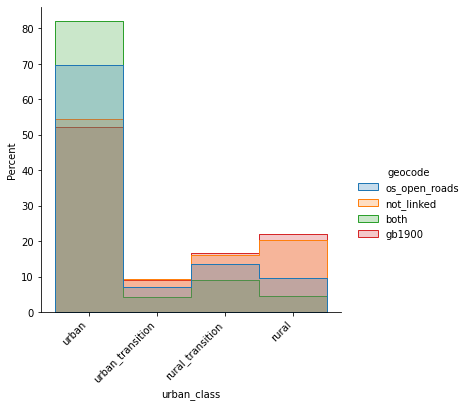

In [ ]:
sns.displot(data=geocode_census, x="urban_class", hue="geocode", element= "step", stat = "percent", common_norm = False).set_xticklabels(rotation=45, horizontalalignment='right')

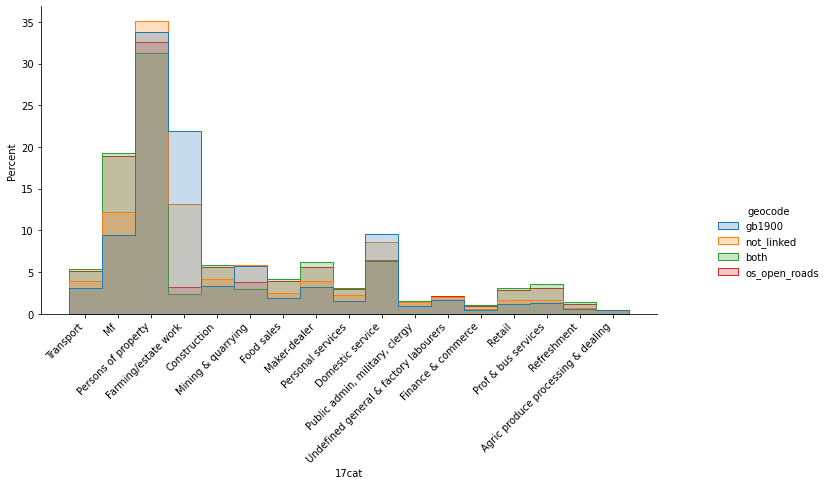

In [17]:
sns.displot(data=geocode_census, x="17cat", hue="geocode", element= "step", stat = "percent", height = 5, aspect = 2,common_norm = False).set_xticklabels(rotation=45, horizontalalignment='right')